In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [10]:
# # sign_mnist_train.csv
# !gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# # sign_mnist_test.csv
# !gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion  
    with open(filename , "r") as training_file:
        ### START CODE HERE
      csv_reader = csv.reader(training_file, delimiter=',')
      headers = next(csv_reader, None)
      temp_images = []
      temp_labels = []
      for row in csv_reader: 
        temp_labels.append(row[0])
        image_data = row[1:785]
        image_data_as_array = np.array_split(image_data, 28)
        temp_images.append(image_data_as_array)
      
      images = np.array(temp_images).astype('float')
      labels = np.array(temp_labels).astype('float')

        ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [16]:
training_labels.max()

24.0

In [11]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) 
testing_images = np.expand_dims(testing_images, axis=3) 

train_datagen = ImageDataGenerator(
    
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(
    
    rescale=1. / 255
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [19]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    ### START CODE HERE                                
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')]
    ### END CODE HERE
    )

model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32), 
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


Epoch 1/15
857/857 [==============================] - 18s 20ms/step - loss: 2.8997 - accuracy: 0.1265 - val_loss: 2.1173 - val_accuracy: 0.3292
Epoch 2/15
857/857 [==============================] - 17s 20ms/step - loss: 2.1744 - accuracy: 0.3116 - val_loss: 1.4744 - val_accuracy: 0.5119
Epoch 3/15
857/857 [==============================] - 17s 20ms/step - loss: 1.8516 - accuracy: 0.4091 - val_loss: 1.2279 - val_accuracy: 0.5756
Epoch 4/15
857/857 [==============================] - 17s 20ms/step - loss: 1.6463 - accuracy: 0.4673 - val_loss: 1.1345 - val_accuracy: 0.5983
Epoch 5/15
857/857 [==============================] - 17s 20ms/step - loss: 1.4717 - accuracy: 0.5206 - val_loss: 0.8891 - val_accuracy: 0.6764
Epoch 6/15
857/857 [==============================] - 17s 20ms/step - loss: 1.3513 - accuracy: 0.5556 - val_loss: 0.8098 - val_accuracy: 0.7110
Epoch 7/15
857/857 [==============================] - 17s 20ms/step - loss: 1.2586 - accuracy: 0.5878 - val_loss: 0.7278 - val_accuracy:

[206.00946044921875, 0.64235919713974]

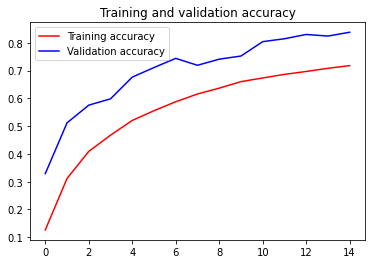

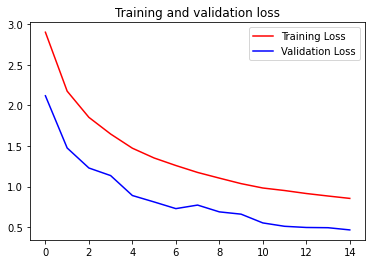

In [20]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()